# Analyzing stock data and portfolio performance using Python

Analyzing stocks by filtering through them in Python involves leveraging its powerful libraries, such as pandas, NumPy, and matplotlib, for handling, analyzing, and visualizing stock data. This process allows for the extraction of meaningful insights from large datasets of stock information.


The analysis is divided into three major parts as below:

1. Getting the stock data and filtering through the 50 stocks: In this part, the historical 3 years stock price data for the 50 stocks is gathered using Yahoo Finance API. Once the data for the 50 stocks is gathered and stored, it is then filtered by using CAGR (Compound Annual Growth Rate) values to find the top 4 stocks with highest CAGR values.


2. Analysing the data for 4 filtered stocks: In this part, the returns (the change in prices for stock) for the 4 stocks is analysed to look for insights and patterns.


3. Creating a portfolio of the 4 stocks and analyzing/optimizing it: In this part, a portfolio of the 4 filtered stocks is created. This portfolio is analyzed by looking at the portfolio value and volatility over time. The portfolio is then optimized using Monte Carlo simulation to get the best allocation percentage for each of the 4 stocks in the portfolio.

## Part 1: Getting the stock data and filtering through the 50 stocks

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Getting the tickers or labels for all the 50 stocks and storing it. Tickers are the symbols of a company stock name. For example, Coal India has the ticker name 'COALINDIA'

In [2]:
tickers = pd.read_csv('NIFTY-50 Tickers.csv')
tickers.head()

,Tickers
0,COALINDIA
1,BPCL
2,ITC
3,KOTAKBANK
4,HINDALCO


### Adding the .NS after the ticker names to get data from Yahoo finance for the 50 Indian stocks. It is required to add '.NS' after the stock tickers for the Indian stocks to get the data

In [3]:
# Creating a list of tickers
ticks = list(tickers['Tickers'])
len(ticks)

50

In [4]:
tickers = []
# Adding .NS after each of the list elements
for i in ticks:
    tickers.append(i+'.NS')
tickers

['COALINDIA.NS',
 'BPCL.NS',
 'ITC.NS',
 'KOTAKBANK.NS',
 'HINDALCO.NS',
 'BHARTIARTL.NS',
 'SBIN.NS',
 'ADANIENT.NS',
 'ASIANPAINT.NS',
 'ONGC.NS',
 'EICHERMOT.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'JSWSTEEL.NS',
 'RELIANCE.NS',
 'NESTLEIND.NS',
 'TCS.NS',
 'TITAN.NS',
 'INFY.NS',
 'TATAMOTORS.NS',
 'BRITANNIA.NS',
 'AXISBANK.NS',
 'WIPRO.NS',
 'POWERGRID.NS',
 'BAJFINANCE.NS',
 'ULTRACEMCO.NS',
 'LTIM.NS',
 'BAJAJ-AUTO.NS',
 'SUNPHARMA.NS',
 'ICICIBANK.NS',
 'GRASIM.NS',
 'NTPC.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'INDUSINDBK.NS',
 'DRREDDY.NS',
 'BAJAJFINSV.NS',
 'APOLLOHOSP.NS',
 'ADANIPORTS.NS',
 'TATASTEEL.NS',
 'HEROMOTOCO.NS',
 'M&M.NS',
 'LT.NS',
 'HDFCBANK.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'DIVISLAB.NS',
 'MARUTI.NS',
 'CIPLA.NS',
 'HDFCLIFE.NS']

### Choosing the start and end date for stock data

In [5]:
start_date = '2021-04-01'
end_date = '2024-03-31'

### Getting the stock data by looping through each of the 50 stock tickers in the list to get the adjusted closing price from yahoo finance for each of the 50 stocks and storing it in a separate dataframe.

In [6]:
%%capture
data = pd.DataFrame()

# Loop through each of the 50 ticker symbol
for ticker_symbol in tickers:
    # Getting the stock data from Yahoo Finance for the 50 stocks
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')
    
    # Extracting the adjusted closing prices from the stock data for the 50 stocks
    adjusted_close = stock_data['Adj Close']
    
    # Renaming the column to the ticker symbol
    adjusted_close = adjusted_close.rename(ticker_symbol)
    
    # Appending the adjusted closing prices to the 'data' DataFrame
    data = pd.concat([data, adjusted_close], axis=1)

In [7]:
# Converting the index of the dataframe to datetime format
data.index = pd.to_datetime(data.index)

In [8]:
# Checking the shape of the dataframe 
data.shape

(740, 50)

In [9]:
# Checking the null values
data.isnull().sum()

COALINDIA.NS     0
BPCL.NS          0
ITC.NS           0
KOTAKBANK.NS     0
HINDALCO.NS      0
BHARTIARTL.NS    0
SBIN.NS          0
ADANIENT.NS      0
ASIANPAINT.NS    0
ONGC.NS          0
EICHERMOT.NS     0
TATACONSUM.NS    0
TECHM.NS         0
JSWSTEEL.NS      0
RELIANCE.NS      0
NESTLEIND.NS     0
TCS.NS           0
TITAN.NS         0
INFY.NS          0
TATAMOTORS.NS    0
BRITANNIA.NS     1
AXISBANK.NS      0
WIPRO.NS         0
POWERGRID.NS     0
BAJFINANCE.NS    0
ULTRACEMCO.NS    0
LTIM.NS          0
BAJAJ-AUTO.NS    0
SUNPHARMA.NS     0
ICICIBANK.NS     0
GRASIM.NS        0
NTPC.NS          0
HCLTECH.NS       0
HINDUNILVR.NS    0
INDUSINDBK.NS    0
DRREDDY.NS       0
BAJAJFINSV.NS    0
APOLLOHOSP.NS    0
ADANIPORTS.NS    0
TATASTEEL.NS     0
HEROMOTOCO.NS    0
M&M.NS           0
LT.NS            0
HDFCBANK.NS      0
SBILIFE.NS       0
SHRIRAMFIN.NS    1
DIVISLAB.NS      0
MARUTI.NS        0
CIPLA.NS         0
HDFCLIFE.NS      0
dtype: int64

#### There is 1 null value in 2 stocks. Since, null values are present in very small quantity, it won't have a significant impact on the analysis.

In [10]:
# Looking at the data
data.head()

,COALINDIA.NS,BPCL.NS,ITC.NS,KOTAKBANK.NS,HINDALCO.NS,BHARTIARTL.NS,SBIN.NS,ADANIENT.NS,ASIANPAINT.NS,ONGC.NS,...,HEROMOTOCO.NS,M&M.NS,LT.NS,HDFCBANK.NS,SBILIFE.NS,SHRIRAMFIN.NS,DIVISLAB.NS,MARUTI.NS,CIPLA.NS,HDFCLIFE.NS
2021-04-01,99.171013,367.592834,197.161469,1801.086182,342.446106,506.612946,354.722687,1105.443115,2497.003906,84.779312,...,2728.042236,782.324158,1407.197144,1446.737793,875.681030,1381.975952,3545.350830,6771.311035,803.360229,684.785339
2021-04-05,97.407471,359.735046,190.441574,1755.823120,342.837189,513.859985,338.357483,1136.443848,2456.785156,84.048080,...,2664.180908,750.211731,1367.453613,1410.587769,867.331299,1338.114990,3540.399658,6619.384277,804.783813,676.014954
2021-04-06,97.782684,359.777100,190.531158,1764.905762,342.641632,517.702393,335.486420,1223.455566,2555.569336,84.454308,...,2665.150146,756.653564,1364.725952,1401.489258,892.181763,1356.064453,3615.942139,6602.514160,820.884399,690.880005
2021-04-07,98.495613,359.861115,191.561569,1788.560303,344.352661,526.846313,343.142639,1163.700562,2572.204834,85.023033,...,2714.661133,771.377808,1367.794434,1408.252197,913.006409,1399.784302,3626.579834,6713.708984,825.498535,693.555725
2021-04-08,98.795776,361.836029,191.068771,1779.827026,357.063019,528.208130,340.319427,1160.655273,2593.781738,84.169960,...,2702.110352,770.263855,1382.406128,1394.239868,903.066284,1407.887451,3642.462891,6676.399902,826.627563,695.141357


### Calculating CAGR (Compund Annual Growth rate for all the stock) for three years 2021 to 2024

In [11]:
# Creating a pandas series with CAGR data for all the 50 stocks
cagr_s = pd.Series()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6904\3300620617.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cagr_s = pd.Series()


In [12]:
for i in tickers:
    cagr_s[i] = ((data[i][-1]/data[i][0])**(1/3)) - 1

In [13]:
# Filtering the top 4 stocks having highest CAGR values
cagr_s.sort_values(ascending=False).head(4)

COALINDIA.NS     0.635818
NTPC.NS          0.525335
TATAMOTORS.NS    0.479126
ONGC.NS          0.467716
dtype: float64

It can be seen that Coal India has a CAGR of 63%, NTPC has a CAGR of 52%, TATA Motors has a CAGR of 47% and ONGC has a CAGR of 46%

In [14]:
# Converting the filtered stocks in a list of stocks. We will loop through them in the next step to get their data.
filtered_stock_list = list(cagr_s.sort_values(ascending=False).head(4).index)
filtered_stock_list

['COALINDIA.NS', 'NTPC.NS', 'TATAMOTORS.NS', 'ONGC.NS']

## Part 2: Analysing the data for 4 filtered stocks

In [15]:
# Concatenating the the stock data for the 4 filtered stocks into a new 'stock_df' dataframe
stock_df = pd.DataFrame()
stock_df.index = data.index
for tick in filtered_stock_list:
    stock_df = pd.concat([data[tick],stock_df],axis=1)

In [16]:
# Checking the datetime index of the stock_df dataframe
stock_df.index

DatetimeIndex(['2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-12', '2021-04-13',
               '2021-04-15', '2021-04-16',
               ...
               '2024-03-14', '2024-03-15', '2024-03-18', '2024-03-19',
               '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-26',
               '2024-03-27', '2024-03-28'],
              dtype='datetime64[ns]', length=740, freq=None)

In [17]:
# Checking the data for the 4 filtered stocks in the stock_df dataframe
stock_df.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
2021-04-01,84.779312,306.793823,94.620407,99.171013
2021-04-05,84.048080,304.102203,93.217323,97.407471
2021-04-06,84.454308,306.793823,92.998093,97.782684
2021-04-07,85.023033,306.843658,92.471947,98.495613
2021-04-08,84.169960,312.974579,92.077316,98.795776


### Plotting the 10 days moving average for the closing prices for the 4 filtered stocks

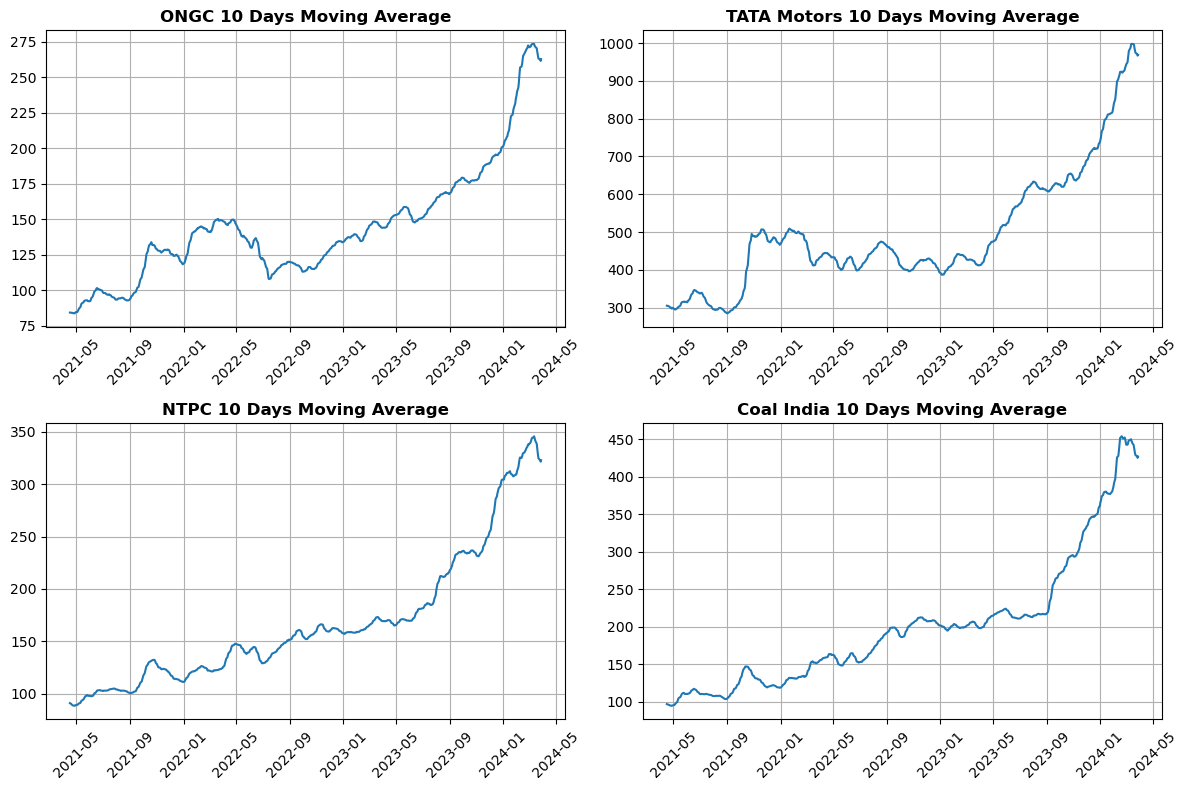

In [18]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
ax[0,0].plot(stock_df['ONGC.NS'].rolling(window=10).mean())
ax[0,0].set_title('ONGC 10 Days Moving Average',fontweight='bold')
ax[0,0].tick_params(axis='x', rotation=45)
ax[0,0].grid(True)
ax[0,1].plot(stock_df['TATAMOTORS.NS'].rolling(window=10).mean())
ax[0,1].set_title('TATA Motors 10 Days Moving Average',fontweight='bold')
ax[0,1].tick_params(axis='x', rotation=45)
ax[0,1].grid(True)
ax[1,0].plot(stock_df['NTPC.NS'].rolling(window=10).mean())
ax[1,0].set_title('NTPC 10 Days Moving Average',fontweight='bold')
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,0].grid(True)
ax[1,1].plot(stock_df['COALINDIA.NS'].rolling(window=10).mean())
ax[1,1].set_title('Coal India 10 Days Moving Average',fontweight='bold')
ax[1,1].tick_params(axis='x', rotation=45)
ax[1,1].grid(True)
plt.tight_layout()

In the above moving average plots for the 4 stocks, it can be seen that the stocks are at different price levels. For example, ONGC price is between 75 and 275 whereas TATA Motors is between 300 and 1000. This difference in price levels for the 4 stocks makes it difficult to look at the movement of stock price relative to each other. For this we will look at normalize returns.

Normalized returns are obtained by dividing the adjusted closing price for each day for a stock by the adjusted price on the first day of the time period. Since the stocks have different price levels, so normalized returns helps in understanding the movement of the stocks relative to each other because the starting points is 1 for each stock.

### Plotting the Normalized prices/returns for each stock in the stock_df dataframe

In [19]:
normalized_returns = pd.DataFrame()
normalized_returns.index = stock_df.index
for stock in list(stock_df.columns):
    normalized_returns[stock] = stock_df[stock]/stock_df[stock][0]

In [20]:
normalized_returns.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
2021-04-01,1.000000,1.000000,1.000000,1.000000
2021-04-05,0.991375,0.991227,0.985171,0.982217
2021-04-06,0.996166,1.000000,0.982854,0.986001
2021-04-07,1.002875,1.000162,0.977294,0.993190
2021-04-08,0.992812,1.020146,0.973123,0.996216


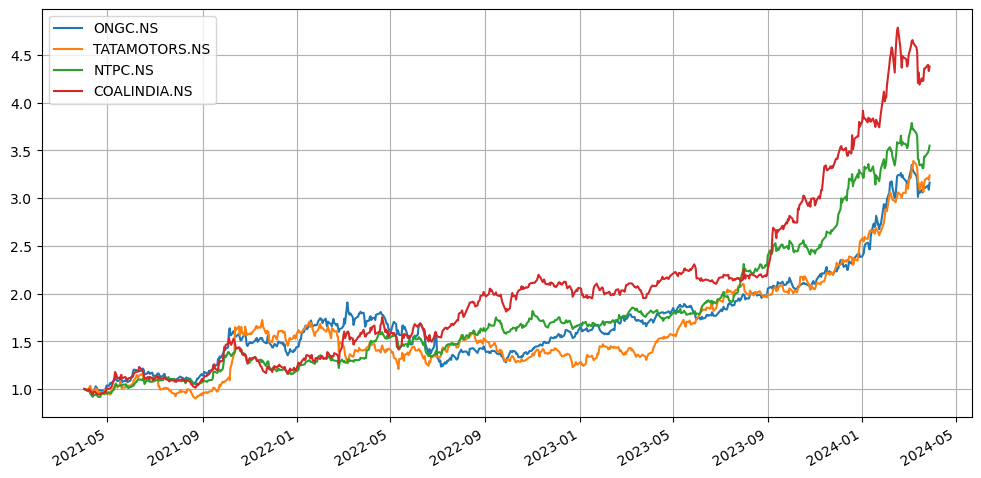

In [21]:
# Plotting the normalized returns for the 4 stocks
normalized_returns.plot(figsize=(12,6))
plt.grid(True)

### Calculating, plotting and analyzing the returns of the stocks

Daily returns informs us of the percent gain (or loss) if we bought the stock on one day and then sold it the next day. The returns are calculated as the daily percent changes in the price. We will calculate daily log returns for the 4 stocks in a separate dataframe

In [22]:
# Calculating the log returns for the 4 stocks in a separate dataframe
log_returns = pd.DataFrame()
for stock in list(stock_df.columns):
    log_returns[stock] = np.log(stock_df[stock]/stock_df[stock].shift(1))

In [23]:
log_returns.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
2021-04-01,NaN,NaN,NaN,NaN
2021-04-05,-0.008663,-0.008812,-0.014940,-0.017943
2021-04-06,0.004822,0.008812,-0.002355,0.003845
2021-04-07,0.006712,0.000162,-0.005674,0.007265
2021-04-08,-0.010084,0.019784,-0.004277,0.003043


### Plotting the distribution of the log returns for the 4 stocks for the last quarter (1st January 2024 to 31st March 2024)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

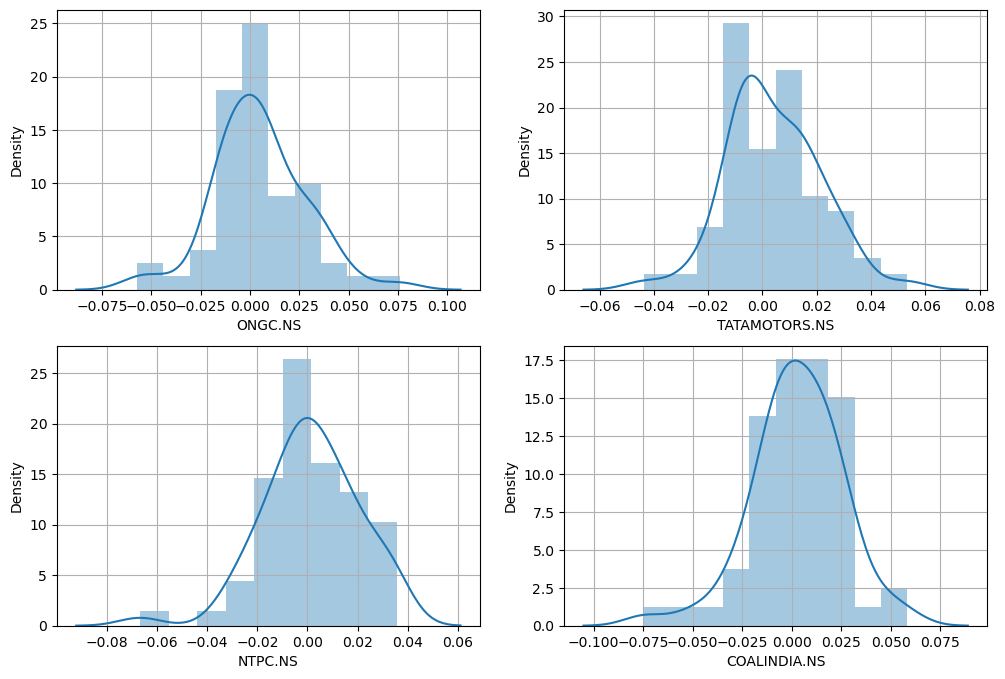

In [24]:
# Plotting the log returns for stocks between 1st January 2024 to 31st March 2024
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.distplot(log_returns['ONGC.NS'].loc['2024-01-01':'2024-03-31'],ax=ax[0,0])
ax[0,0].grid(True)
sns.distplot(log_returns['TATAMOTORS.NS'].loc['2024-01-01':'2024-03-31'], ax=ax[0,1])
ax[0,1].grid(True)
sns.distplot(log_returns['NTPC.NS'].loc['2024-01-01':'2024-03-31'], ax=ax[1,0])
ax[1,0].grid(True)
sns.distplot(log_returns['COALINDIA.NS'].loc['2024-01-01':'2024-03-31'], ax=ax[1,1])
ax[1,1].grid(True)

It can be seen above that the shape of the distribution of log returns for the 4 stocks resemble the shape of normal distribution (mound-shaped). We can see that some of them have longer tails than the others and are more spread out than the other, some are more spread on the negative side than the other. We will look more granularly at these using a boxplot.

### Plotting the boxplot for the log returns for the stocks between 1st January 2024 to 31st March 2024

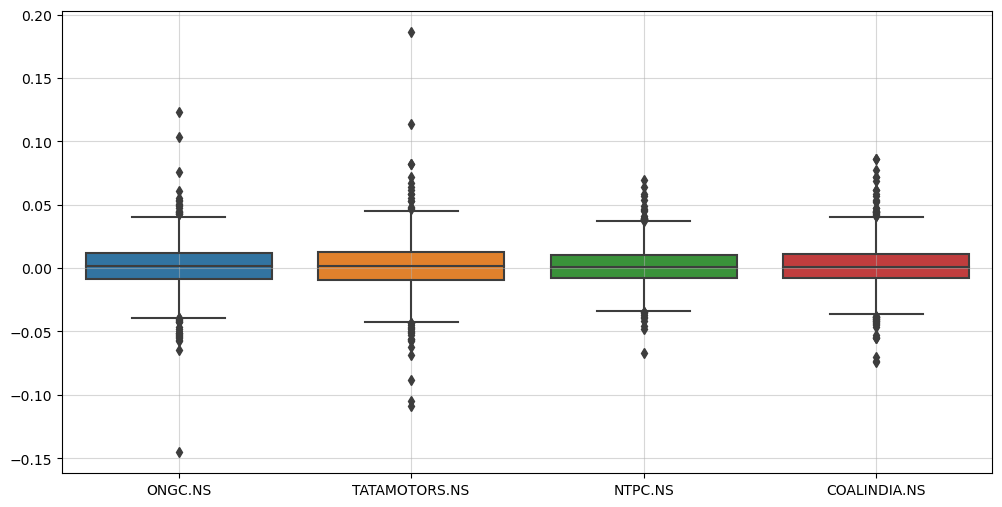

In [25]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=log_returns, ax=ax)
ax.grid(True, alpha =0.5)

In the boxplot above, it can be seen that ONGC and TATA Motors have more extreme values as compared to NTPC and Coal India. Also, NTPC has a wider IQR (Inter Quartile Range. NTPC has the shortest lower whisker length as well as the shortest upper whisker length meaning that the daily returns are more centered around zero. TATA Motors has the longest lower whisker length as well as the longest upper whisker length meaning that the daily returns are more spread around zero.

### Analyzing the distribution of returns by plotting Q-Q plots

In [26]:
import scipy.stats as stats

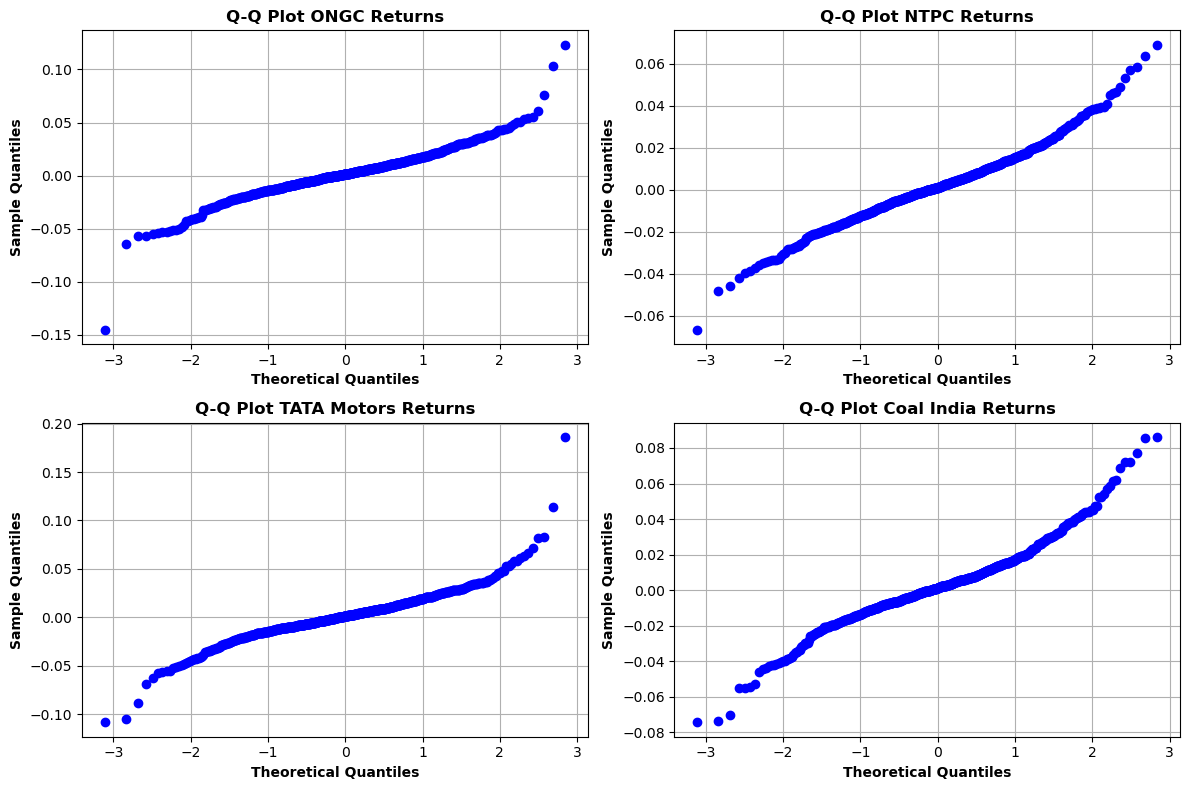

In [27]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
stats.probplot(log_returns['ONGC.NS'], dist="norm", plot=ax[0,0])
ax[0,0].set_title('Q-Q Plot ONGC Returns', fontweight = 'bold')
ax[0,0].set_xlabel('Theoretical Quantiles', fontweight = 'bold')
ax[0,0].set_ylabel('Sample Quantiles', fontweight = 'bold')
ax[0,0].grid(True)
stats.probplot(log_returns['NTPC.NS'], dist="norm", plot=ax[0,1])
ax[0,1].set_title('Q-Q Plot NTPC Returns', fontweight = 'bold')
ax[0,1].set_xlabel('Theoretical Quantiles', fontweight = 'bold')
ax[0,1].set_ylabel('Sample Quantiles', fontweight = 'bold')
ax[0,1].grid(True)
stats.probplot(log_returns['TATAMOTORS.NS'], dist="norm", plot=ax[1,0])
ax[1,0].set_title('Q-Q Plot TATA Motors Returns', fontweight = 'bold')
ax[1,0].set_xlabel('Theoretical Quantiles', fontweight = 'bold')
ax[1,0].set_ylabel('Sample Quantiles', fontweight = 'bold')
ax[1,0].grid(True)
stats.probplot(log_returns['COALINDIA.NS'], dist="norm", plot=ax[1,1])
ax[1,1].set_title('Q-Q Plot Coal India Returns', fontweight = 'bold')
ax[1,1].set_xlabel('Theoretical Quantiles', fontweight = 'bold')
ax[1,1].set_ylabel('Sample Quantiles', fontweight = 'bold')
ax[1,1].grid(True)
plt.tight_layout()

It can be seen in the above Q-Q plots that the returns of ONGC and TATA Motors are deviating more from the normal distribution at tail ends whereas returns of Coal India and NTPC returns are deviating less from the normal distribution

### Finding correlation between the returns of the 4 stocks

In [28]:
log_returns.corr()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
ONGC.NS,1.000000,0.232302,0.432279,0.481106
TATAMOTORS.NS,0.232302,1.000000,0.357160,0.349759
NTPC.NS,0.432279,0.357160,1.000000,0.505515
COALINDIA.NS,0.481106,0.349759,0.505515,1.000000


<AxesSubplot:>

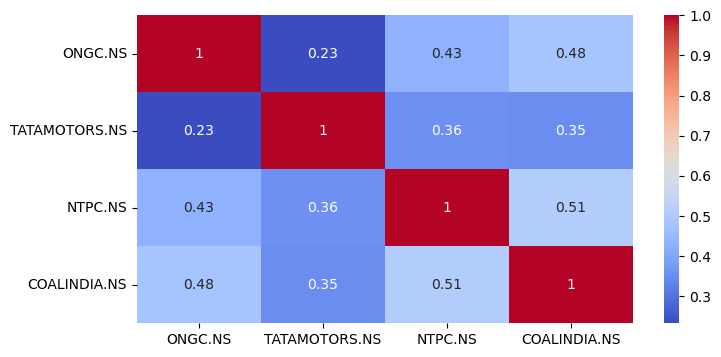

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(log_returns.corr(),cmap='coolwarm',annot=True)

No large correlation between the returns of the 4 stocks. It makes sense since all the 4 stocks are of companies in separate industries

## Part 3: Creating a portfolio of the 4 stocks and analyzing/optimizing it

We will create a portfolio using the 4 filtered stocks above and allocate 25% of the total money to be invested in each of the 4 stocks (meaning 25 % allocation for each of the 4 stocks). We will assum that we want to invest 100000 (or 1 Lakh) rupees in the entire portfolio.

In [30]:
# Array for weights allocation
allocation_weights = np.array([0.25,0.25,0.25,0.25])

Creating portfolio dataframe by multiplying normalized_returns dataframe with allocation weights and 100000 (assuming we want to invest 1 lakh rupees in the entire portfolio)

In [31]:
normalized_returns.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
2021-04-01,1.000000,1.000000,1.000000,1.000000
2021-04-05,0.991375,0.991227,0.985171,0.982217
2021-04-06,0.996166,1.000000,0.982854,0.986001
2021-04-07,1.002875,1.000162,0.977294,0.993190
2021-04-08,0.992812,1.020146,0.973123,0.996216


In [32]:
# Creating portfolio dataframe 
portfolio = (normalized_returns*allocation_weights)*100000 # Assuming we want to invest 1 Lakh in the portfolio
portfolio.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS
2021-04-01,25000.000000,25000.000000,25000.000000,25000.000000
2021-04-05,24784.372015,24780.665412,24629.286154,24555.429020
2021-04-06,24904.161590,25000.000000,24571.362430,24650.016544
2021-04-07,25071.869246,25004.060969,24432.347510,24829.738610
2021-04-08,24820.312262,25503.657110,24328.080776,24905.406706


We can see above in the portfolio dataframe that multiplying normalized_returns with allocation_weights and 100000 enables us to track the value of the investment in each stock over time. Next, let us create an another column in the above portfolio dataframe to track the overall total value of the portfolio by adding the individual values.

In [33]:
portfolio['Total Value'] = portfolio.sum(axis=1)

In [54]:
portfolio.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS,Total Value,Daily Returns
2021-04-01,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000,NaN
2021-04-05,24784.372015,24780.665412,24629.286154,24555.429020,98749.752601,-0.012502
2021-04-06,24904.161590,25000.000000,24571.362430,24650.016544,99125.540565,0.003805
2021-04-07,25071.869246,25004.060969,24432.347510,24829.738610,99338.016334,0.002144
2021-04-08,24820.312262,25503.657110,24328.080776,24905.406706,99557.456854,0.002209


The 'Total Value' tracks the total value of the portfolio over time.

### Plotting the portfolio value and volatility of portfolio value over time

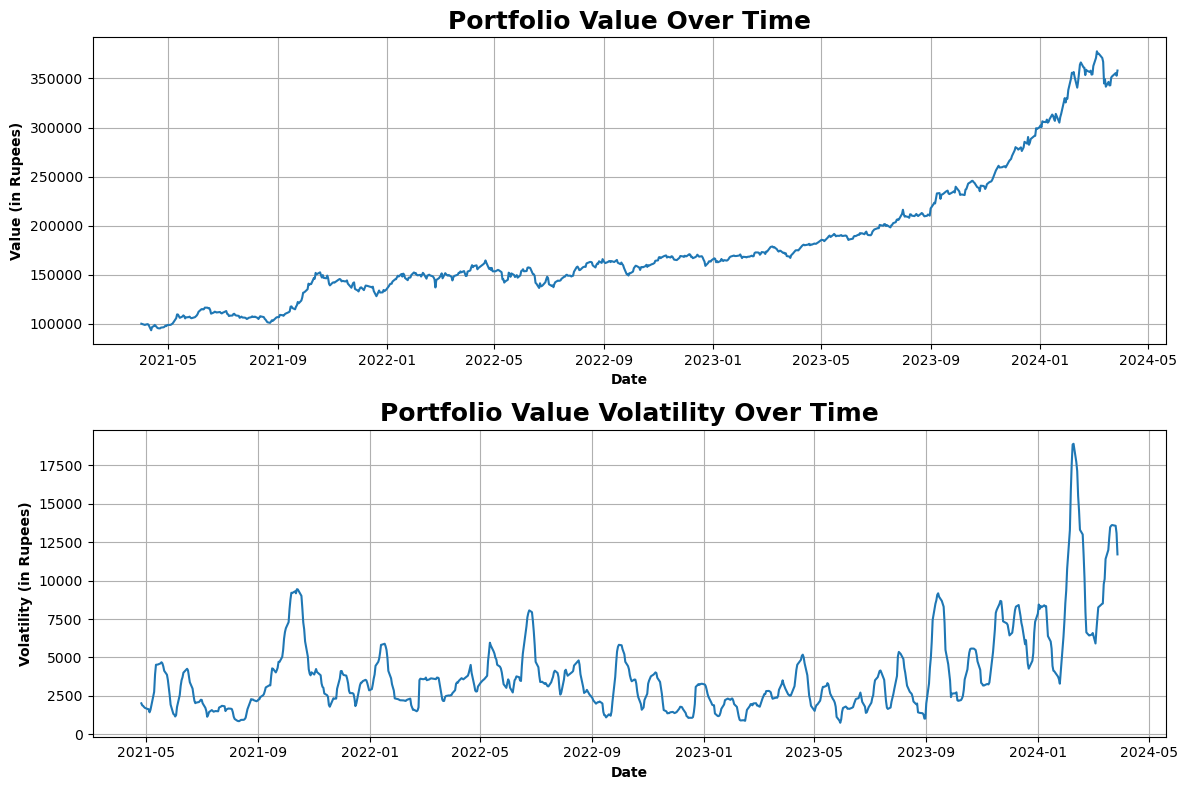

In [35]:
# Plotting the portfolio value over time
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
ax[0].plot(portfolio['Total Value'])
ax[0].set_xlabel('Date',fontweight='bold')
ax[0].set_ylabel('Value (in Rupees)',fontweight='bold')
ax[0].set_title('Portfolio Value Over Time',fontweight='bold',fontsize=18)
ax[0].grid(True)
# Plotting portfolio value volatility using 15 day rolling standard deviation 
ax[1].plot(portfolio['Total Value'].rolling(window=15).std().dropna())
ax[1].set_xlabel('Date',fontweight='bold')
ax[1].set_ylabel('Volatility (in Rupees)',fontweight='bold')
ax[1].set_title('Portfolio Value Volatility Over Time',fontweight='bold',fontsize=18)
ax[1].grid(True)
plt.tight_layout()

### Calculating portfolio returns and plotting its volatility over time

In [36]:
# Creatinng a new column in portfolio dataframe to calculate daily portfolio returns
portfolio['Daily Returns'] =  portfolio['Total Value'].pct_change()
portfolio.head()

,ONGC.NS,TATAMOTORS.NS,NTPC.NS,COALINDIA.NS,Total Value,Daily Returns
2021-04-01,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000,NaN
2021-04-05,24784.372015,24780.665412,24629.286154,24555.429020,98749.752601,-0.012502
2021-04-06,24904.161590,25000.000000,24571.362430,24650.016544,99125.540565,0.003805
2021-04-07,25071.869246,25004.060969,24432.347510,24829.738610,99338.016334,0.002144
2021-04-08,24820.312262,25503.657110,24328.080776,24905.406706,99557.456854,0.002209


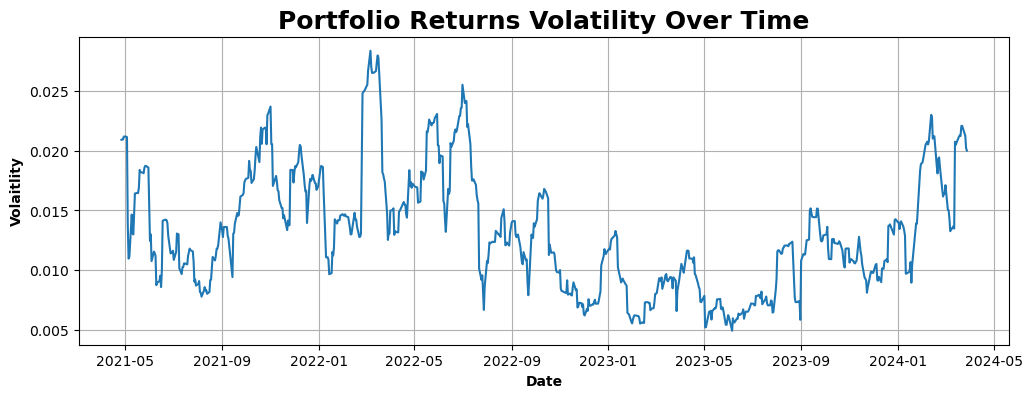

In [37]:
# Calculating 15 day rolling standard deviation to calculate portfolio volatility over time
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(portfolio['Daily Returns'].rolling(window=15).std())
ax.set_title('Portfolio Returns Volatility Over Time', fontweight='bold',fontsize=18)
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Volaitlity', fontweight='bold')
plt.grid(True)

It can be seen above that portfolio returns are more volatile from September 2021 to July 2022. Then volatility is low between September 2022 to September 2023

### Plotting portfolio negative volatility over time

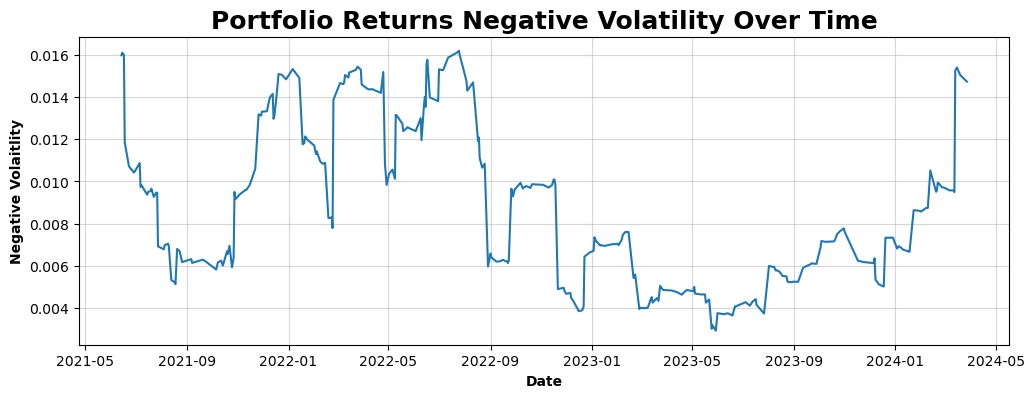

In [38]:
# Calculating and plotting negative volatility only (where 15 day rolling returns were negative)
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(portfolio[portfolio['Daily Returns']<0]['Daily Returns'].rolling(window=15).std())
ax.set_title('Portfolio Returns Negative Volatility Over Time', fontweight='bold',fontsize=18)
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Negative Volaitlity', fontweight='bold')
plt.grid(True, alpha=0.5)

It can be seen above that portfolio returns

### Optimizing portfolio allocation using Monte Carlo simulation

Earlier we considered an equal allocation of 25% in each of the 4 stocks. Now, we will optimize the allocation to come up with best allocation percentages for each of the 4 stocks in the portfolio using Monte Carlo simulation. We will optimize the portfolio using Sharpe Ratio. 

The Sharpe Ratio is a measure of risk-adjusted return, calculated as the ratio of the excess return of an investment (return above the risk-free rate, generally meaning the yield of 10 year Government bonds which is the least risky investment) to its standard deviation. It measures the excess return (return above the risk-free rate) per unit of risk (standard deviation). A higher Sharpe Ratio indicates better risk-adjusted returns. It is calculated by subtracting the risk free rate from the returns and dividing it by standard deviation



In [42]:
np.random.seed(98)
# Initializing all the values for the simulation
number_porfolios = 5000
allocation_array = np.zeros((number_porfolios, len(log_returns.columns.tolist())))
returns_array = np.zeros(number_porfolios)
volatility_array = np.zeros(number_porfolios)
sharpe_array = np.zeros(number_porfolios)

for i in range(0,number_porfolios):
    weights = np.array(np.random.random(4))
    # Normalizing the weights so that their sum is 1
    weights = weights/np.sum(weights)
    allocation_array[i,:] = weights
    # Calculating returns
    returns_array[i] = np.sum(weights*log_returns.mean()*250)
    # Calculating volatility
    volatility_array[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
    # Calculating Sharpe ratio assuming 7% yield in 10 Year Indian government bonds
    sharpe_array[i] = (returns_array[i] - 0.07)/volatility_array[i]

In [43]:
# Getting the max sharpe ratio after performing simulation
sharpe_array.max()

1.680575638521009

In [44]:
# Getting the index for these max sharpe ratio value
sharpe_array.argmax()

3747

In [45]:
# Finding the allocation weights (percentages) for the max sharpe ratio
allocation_array[sharpe_array.argmax(),:]

array([0.10257443, 0.12201477, 0.44551111, 0.32989969])

We can see in the above array our optimized portfolio allocation for maximum Sharpe ratio of 1.68. We should allocate 10% to ONGC, 12% to TATA Motors, 44% to NTPC, 33% to Coal India

In [46]:
log_returns.columns.tolist()

['ONGC.NS', 'TATAMOTORS.NS', 'NTPC.NS', 'COALINDIA.NS']

### Plotting the return-volatility graph for the optimized portfolio

In [52]:
# Return for the max sharpe ratio
return_sharpe_max = returns_array[sharpe_array.argmax()]
# Volatility for the max sharpe ratio
volatility_sharpe_max = volatility_array[sharpe_array.argmax()]

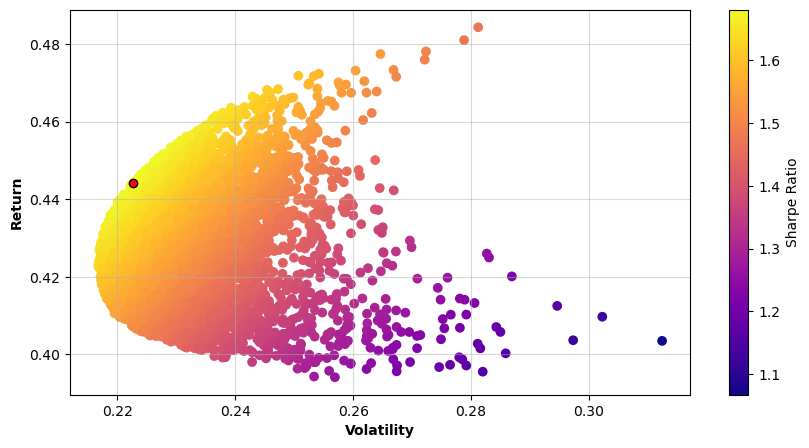

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(volatility_array,returns_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility',fontweight = 'bold')
plt.ylabel('Return',fontweight = 'bold')
# Highlighting the point with the returns and volatility with the highest sharpe ratio
plt.scatter(volatility_sharpe_max,return_sharpe_max, c='red', edgecolors='black')
plt.grid(True,alpha=0.5)